## Tracing Black Hole with OpenGadget3
# Analysis of Chandrasekhar dynamical friction formula approximations

This notebook offers a reading support to Report III. The python code I used to make graphs are explictly shown.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math 
from random import seed
from random import random

After loading the libraries, I will set up constants and the dataset

In [4]:
G=6.67*1e-11 #m^3/s^2/kg
pc=3*1e16 #m
M_sol=1.99*1e30 #kg
c=3*1e8 #m/s

As I explained in the report, the following dataset was chosen, this data will not be changed. 



In [53]:
v_bh=100000 #m/s
m_star=M_sol
sigma=70000 #m/s

## Dynamical friction as a function of BH masses

In this section we will analyse dynamical friction a function of masses, choosing a smoothing lenght of $1 kpc$ and a surrounding density equal to $10^5 \rho_c$

In [54]:
hsml=1000*pc
rho_bk=8.5*1e-22 #10000 rho_crit at H_0=67.4 m/s/Mpc kg/m^3

With an array of masses varying from $10^5 \ M_\odot$ to $10^{10} M_\odot$

In [55]:
M_bh=np.geomspace(M_sol*1e5,M_sol*1e10, 100)
r_sch=2*G*M_bh/(c*c)

Now we calculate $\Lambda$, the Coulomb logarithm and we will calculate the force, using the equations:
    $$
    force_{df}=\boxed{	\frac{d \vec{v}_M}{dt}=-\frac{4 \pi \ln \Lambda G^2 (M+m)n_0 m}{v_M^3}\left[ erf(x)-\frac{2x}{\sqrt{\pi}} e^{-x^2}\right] \vec{v}_M}
    $$
    $$
    force_{df_np}=\boxed{ F_{DF}=-\frac{2 \pi \ln (1+\Lambda^2) G^2 M (M+m)n_0 m}{v_M^3}\left[ erf(x)-\frac{2x}{\sqrt{pi}} e^{-x^2}\right] \vec{v}_M}
    $$
    $$
    force_{new}=\boxed{ F_{DF}=-\frac{2 \pi \ln \left( \frac{G^2(M+m)^2+b_{max}^2v_{typ}^4}{G^2(M+m)^2+R_{Sch}^2v_{typ}^4}\right) G^2 M (M+m)n_0 m}{v_M^3}\left[ erf(x)-\frac{2x}{\sqrt{pi}} e^{-x^2}\right] \vec{v}_M }
    $$

In [56]:
lambd=(hsml*v_bh**2)/(G*M_bh)
x=v_bh/np.sqrt(2)/sigma 
lambd_new=(G*G*M_bh*M_bh+hsml*hsml*v_bh*v_bh*v_bh*v_bh)/(G*G*M_bh*M_bh+r_sch*r_sch*v_bh*v_bh)
a_df=-4*np.pi*np.log(lambd)*G*G*M_bh*rho_bk*(math.erf(x)-((2*x)/np.sqrt(np.pi))*np.e**(-x**2))/(v_bh**2)
a_df_np=-2*np.pi*np.log(1+lambd*lambd)*G*G*M_bh*rho_bk*(math.erf(x)-((2*x)/np.sqrt(np.pi))*np.e**(-x**2))/(v_bh**2)

a_new=-2*np.pi*np.log(lambd_new)*G*G*M_bh*rho_bk*(math.erf(x)-((2*x)/np.sqrt(np.pi))*np.e**(-x**2))/(v_bh**2)

force_df=M_bh*a_df
force_df_np=M_bh*a_df_np
force_new=M_bh*a_new

Then we can plot the forces, comparing the one with the approximation to the other:
    

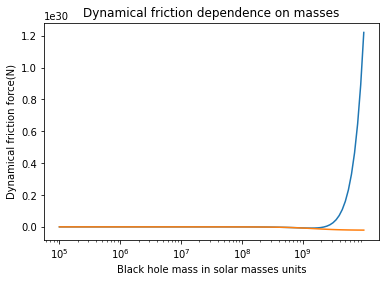

In [57]:

M_bh_pc=M_bh/M_sol
M_bh_array=np.array([1e5,1e6,1e7,1e8,1e9])




plt.plot(M_bh_pc, force_df)
plt.plot(M_bh_pc, force_df_np)
plt.xscale('log')

plt.xticks(M_bh_array)
plt.xlabel("Black hole mass in solar masses units")
plt.ylabel("Dynamical friction force(N)")
plt.title("Dynamical friction dependence on masses")



plt.show()


While without the approximation the two graphs coincide:
    

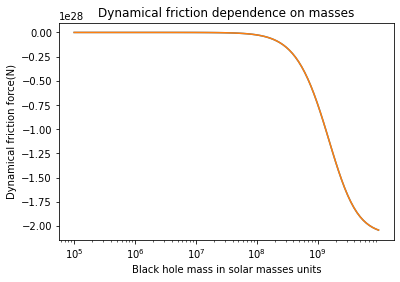

In [58]:
plt.plot(M_bh_pc, force_new)
plt.plot(M_bh_pc, force_df_np)
plt.xscale('log')

plt.xticks(M_bh_array)
plt.xlabel("Black hole mass in solar masses units")
plt.ylabel("Dynamical friction force(N)")
plt.title("Dynamical friction dependence on masses")



plt.show()

## Dynamical friction as a function of BH smoothing lenght

In order to describe the dynamical friction as a function of smoothing lenght instead of masses, we will first of all set a constant BH mass of $10^8$ solar masses, and let the smoothing lenght vary in a given range:

In [68]:
M_bh=M_sol*3e8
r_sch=2*G*M_bh/(c*c)
hsml=np.geomspace(10*pc,10000*pc, 100)

Since the smoothing lenght affects also the density calculus, we need to recalculate density, through the equation:
$$
\rho_i=\sum_{j=1}^{N}m_j W(|r_{ij}|,h)
$$
we set that all surrounding particles have the same masses equal to one solr mass, and we will use the same kernel as OpenGadget3: 

In [69]:
def W(radius,h):
	if radius/h>=0 and radius/h<=0.5:
	   w=8/(np.pi*h**3)*(1-6*(radius/h)**2+6*(radius/h)**3)
	if radius/h>0.5 and radius/h<1:
	   w=8/(np.pi*h**3)*(2*(1-radius/h)**3)
	else:
		w=0
	return w

As regards the number of particles used, we will show that this number is not critical, but until then let's suppose we have a constant particle number equal to:

In [76]:
n_star=64

In [79]:
density=np.zeros(len(hsml))
for i in range(len(hsml)):
	for j in range(n_star):
		rad=r_sch+(random()*(hsml[i]-r_sch))
		density[i]+=W(rad,hsml[i])*m_star

And now we can recalculate in all the cases above the dynamical friction force:

In [101]:
lambd=(hsml*v_bh**2)/(G*M_bh)

In [102]:
lambd_new=(G*G*M_bh*M_bh+hsml*hsml*v_bh*v_bh*v_bh*v_bh)/(G*G*M_bh*M_bh+r_sch*r_sch*v_bh*v_bh)

a_new=-2*np.pi*np.log(lambd_new)*G*G*M_bh*density*(math.erf(x)-((2*x)/np.sqrt(np.pi))*np.e**(-x**2))/(v_bh**2)
f_df=-4*np.pi*np.log(lambd)*G*G*M_bh*M_bh*density*(math.erf(x)-((2*x)/np.sqrt(np.pi))*np.e**(-x**2))/(v_bh**2)
f_df_np=-2*np.pi*np.log(1+lambd*lambd)*G*G*M_bh*M_bh*density*(math.erf(x)-((2*x)/np.sqrt(np.pi))*np.e**(-x**2))/(v_bh**2)

force_new=M_bh*a_new

And then we can check the results obtained comparing the force without the approximation with the one using the approximation:

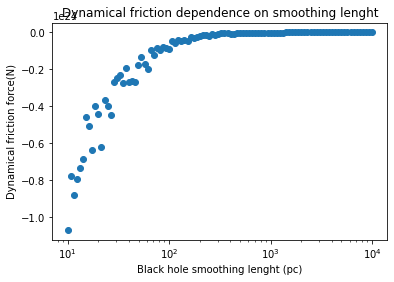

In [103]:
hsml_pc=hsml/pc
hsml_array=np.array([10,100,1000,10000])

plt.scatter(hsml_pc, force_new)



plt.xscale('log')


plt.xticks(hsml_array)
plt.xlabel("Black hole smoothing lenght (pc)")
plt.ylabel("Dynamical friction force(N)")
plt.title("Dynamical friction dependence on smoothing lenght")



plt.show()

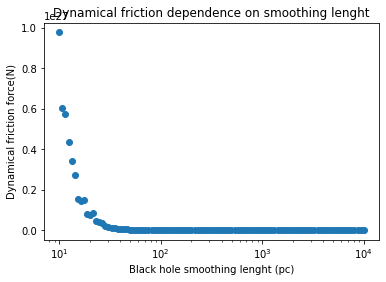

In [106]:


plt.scatter(hsml_pc, f_df)



plt.xscale('log')


plt.xticks(hsml_array)
plt.xlabel("Black hole smoothing lenght (pc)")
plt.ylabel("Dynamical friction force(N)")
plt.title("Dynamical friction dependence on smoothing lenght")



plt.show()

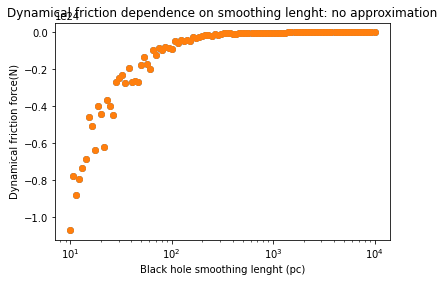

In [113]:


plt.scatter(hsml_pc, force_new)
plt.scatter(hsml_pc, f_df_np)



plt.xscale('log')


plt.xticks(hsml_array)
plt.xlabel("Black hole smoothing lenght (pc)")
plt.ylabel("Dynamical friction force(N)")
plt.title("Dynamical friction dependence on smoothing lenght: no approximation")



plt.show()

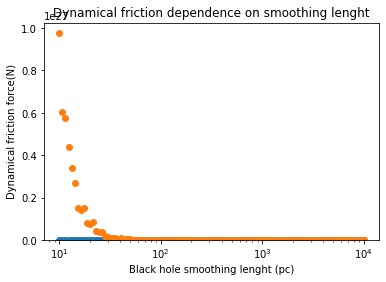

In [112]:
plt.scatter(hsml_pc, force_new)
plt.scatter(hsml_pc, f_df)



plt.xscale('log')
plt.ylim(bottom=1e-10)


plt.xticks(hsml_array)
plt.xlabel("Black hole smoothing lenght (pc)")
plt.ylabel("Dynamical friction force(N)")
plt.title("Dynamical friction dependence on smoothing lenght")



plt.show()